In [1]:
# dataset: graduation-rate-by-zone-school-type-school-stage-gender-nationality-group-ds

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_excel('graduation_rate.xlsx')
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,School_Stage_EN,Gender_EN,Unnamed: 6,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Expat,8,243,251,0.968127
1,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Local,20,353,373,0.946381
2,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Expat,28,182,210,0.866667
3,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Local,23,262,285,0.919298
4,2015,Ajman,"25.244000,55.266140",Private Schools,Cycle 3,Female,NaN,Expat,11,424,435,0.974713


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       401 non-null    int64  
 1   Zone_EN                    401 non-null    object 
 2   Coordinates                333 non-null    object 
 3   School_Type_EN             401 non-null    object 
 4   School_Stage_EN            401 non-null    object 
 5   Gender_EN                  401 non-null    object 
 6   Unnamed: 6                 0 non-null      float64
 7   LocalFlag_EN               401 non-null    object 
 8   Number of Failed students  401 non-null    int64  
 9   Number of Pass students    401 non-null    int64  
 10  Total Number of Students   401 non-null    int64  
 11  Graduation %               401 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 37.7+ KB


In [5]:
df.shape

(401, 12)

In [6]:
# Dropping "Unnamed: 6"

df=df.drop("Unnamed: 6", axis=1)

In [7]:
# Checking null values:

print(df.isnull().sum())

Year                          0
Zone_EN                       0
Coordinates                  68
School_Type_EN                0
School_Stage_EN               0
Gender_EN                     0
LocalFlag_EN                  0
Number of Failed students     0
Number of Pass students       0
Total Number of Students      0
Graduation %                  0
dtype: int64


In [8]:
df.describe()

,Year,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,2017.052369,17.304239,321.152120,338.456359,0.889527
std,1.401696,31.879260,585.686993,593.339872,0.163917
min,2015.000000,0.000000,1.000000,1.000000,0.333333
25%,2016.000000,0.000000,44.000000,50.000000,0.827586
50%,2017.000000,5.000000,112.000000,141.000000,0.977500
75%,2018.000000,20.000000,329.000000,373.000000,1.000000
max,2019.000000,264.000000,5268.000000,5353.000000,1.000000


In [9]:
# Value counts for each feature:

for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print()

Value counts for Year:
2019    84
2016    83
2017    82
2018    80
2015    72
Name: Year, dtype: int64

Value counts for Zone_EN:
Ajman           73
DUBAI           68
Fujairah        66
Sharjah         66
Ras AlKhaima    65
Umm AlQuwain    63
Name: Zone_EN, dtype: int64

Value counts for Coordinates:
25.244000,55.266140    73
25.133300,56.250000    66
25.322327,55.513641    66
25.800694,55.976200    65
25.520482,55.713391    63
Name: Coordinates, dtype: int64

Value counts for School_Type_EN:
Public Schools                  120
Continuing Education Centers    120
Private Schools                 116
ACTVET                           45
Name: School_Type_EN, dtype: int64

Value counts for School_Stage_EN:
Cycle 3    401
Name: School_Stage_EN, dtype: int64

Value counts for Gender_EN:
Male      212
Female    189
Name: Gender_EN, dtype: int64

Value counts for LocalFlag_EN:
Local    206
Expat    195
Name: LocalFlag_EN, dtype: int64

Value counts for Number of Failed students:
0      102
1 

In [10]:
# Dropping "Coordinates" and "School_Stage_EN"

df = df.drop(["Coordinates" , "School_Stage_EN"], axis=1)
df.head()

,Year,Zone_EN,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,Public Schools,Female,Expat,8,243,251,0.968127
1,2015,Ajman,Public Schools,Female,Local,20,353,373,0.946381
2,2015,Ajman,Public Schools,Male,Expat,28,182,210,0.866667
3,2015,Ajman,Public Schools,Male,Local,23,262,285,0.919298
4,2015,Ajman,Private Schools,Female,Expat,11,424,435,0.974713


**Histogram of Numeric Varients**

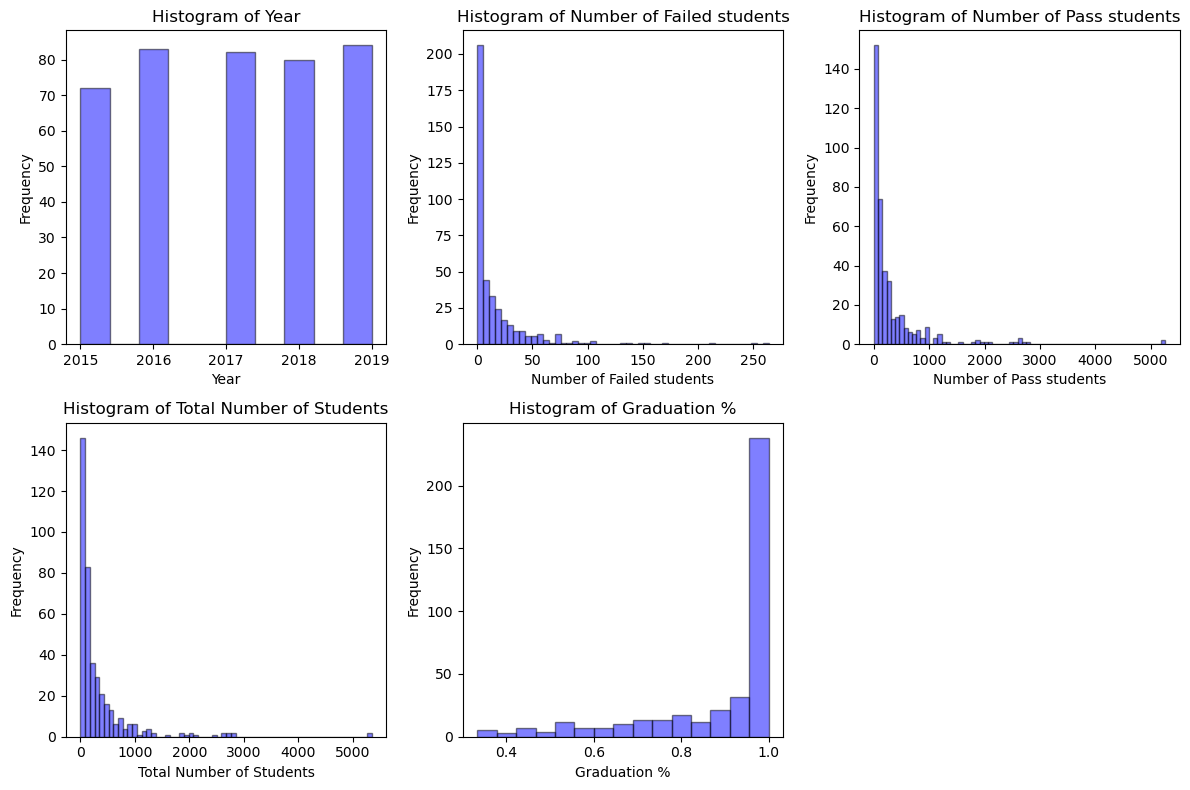

In [11]:
# Histogram of Numeric varients: "year, "Number of Failed students", "Number of Pass students", "Total Number of Students", "Graduation %"

plt.figure(figsize=(12, 8))

# Histogram of 'Year'
plt.subplot(2, 3, 1)
plt.hist(df['Year'], bins='auto', edgecolor='black', color='b', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Year')

# Histogram of 'Number of Failed students'
plt.subplot(2, 3, 2)
plt.hist(df['Number of Failed students'], bins='auto', edgecolor='black', color='b', alpha=0.5)
plt.xlabel('Number of Failed students')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Failed students')

# Histogram of 'Number of Pass students	'
plt.subplot(2, 3, 3)
plt.hist(df['Number of Pass students'], bins='auto', edgecolor='black', color='b', alpha=0.5)
plt.xlabel('Number of Pass students')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pass students')

# Histogram of 'Total Number of Students'
plt.subplot(2, 3, 4)
plt.hist(df['Total Number of Students'], bins='auto', edgecolor='black', color='b', alpha=0.5)
plt.xlabel('Total Number of Students')
plt.ylabel('Frequency')
plt.title('Histogram of Total Number of Students')

# Histogram of 'Graduation %'
plt.subplot(2, 3, 5)
plt.hist(df['Graduation %'], bins='auto', edgecolor='black', color='b', alpha=0.5)
plt.xlabel('Graduation %')
plt.ylabel('Frequency')
plt.title('Histogram of Graduation %')


plt.tight_layout()
plt.show()

**Pair Plots of Varients**

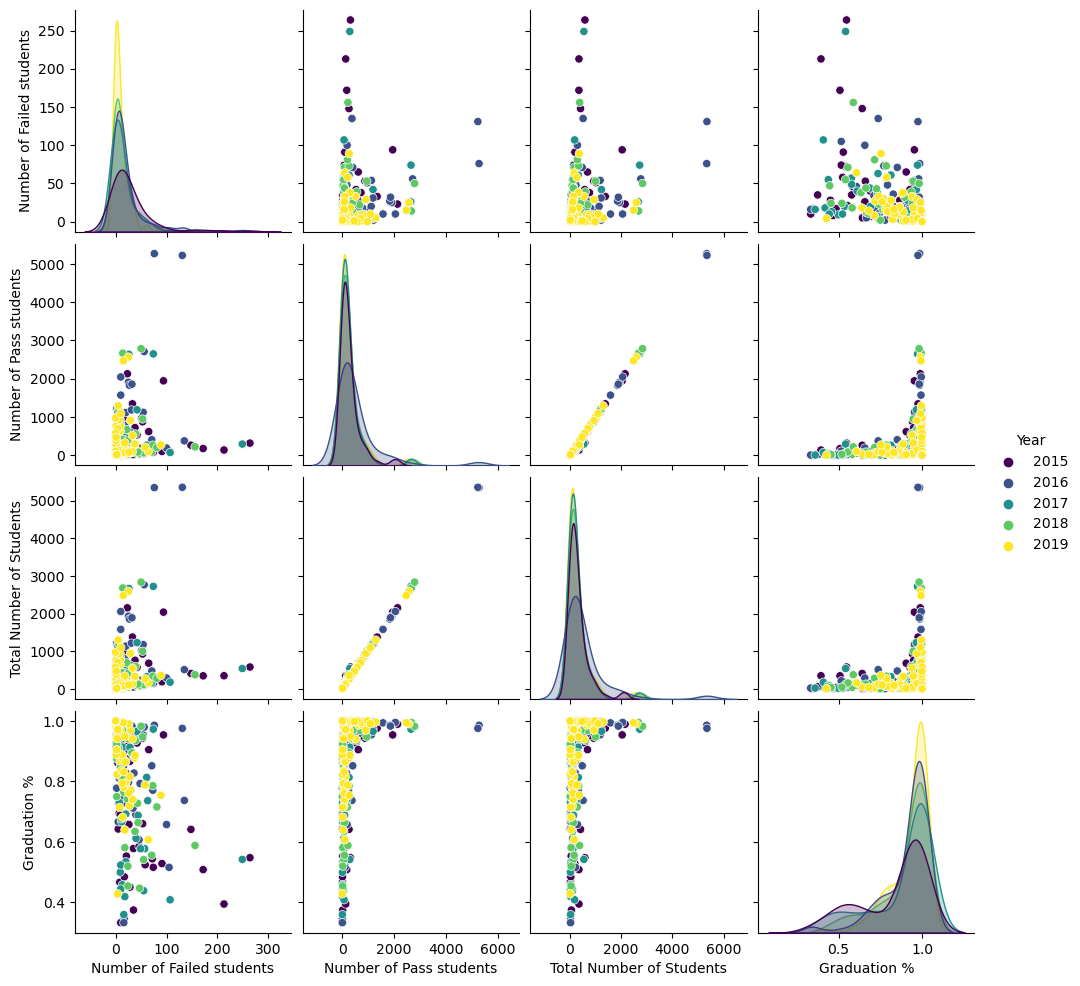

In [12]:
# Pair Plot ,  hue='Year'

sns.pairplot(df, hue='Year', palette='viridis')

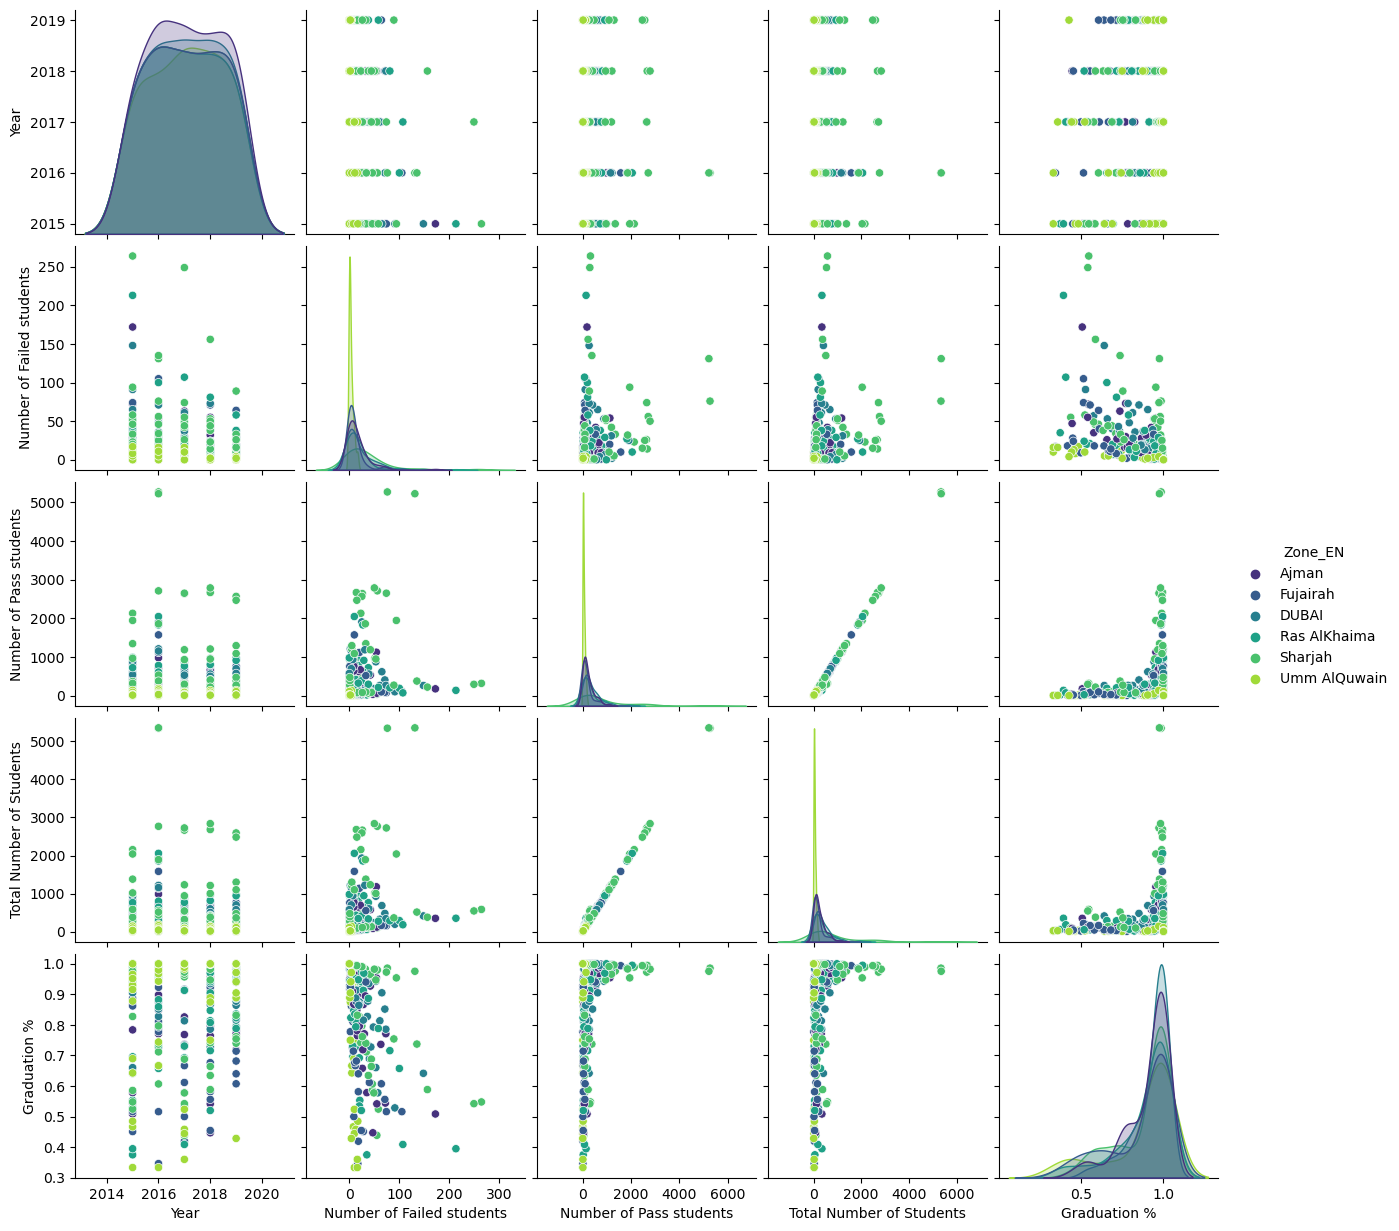

In [13]:
# Pair Plot ,  hue='Zone_EN'

sns.pairplot(df, hue='Zone_EN', palette='viridis')

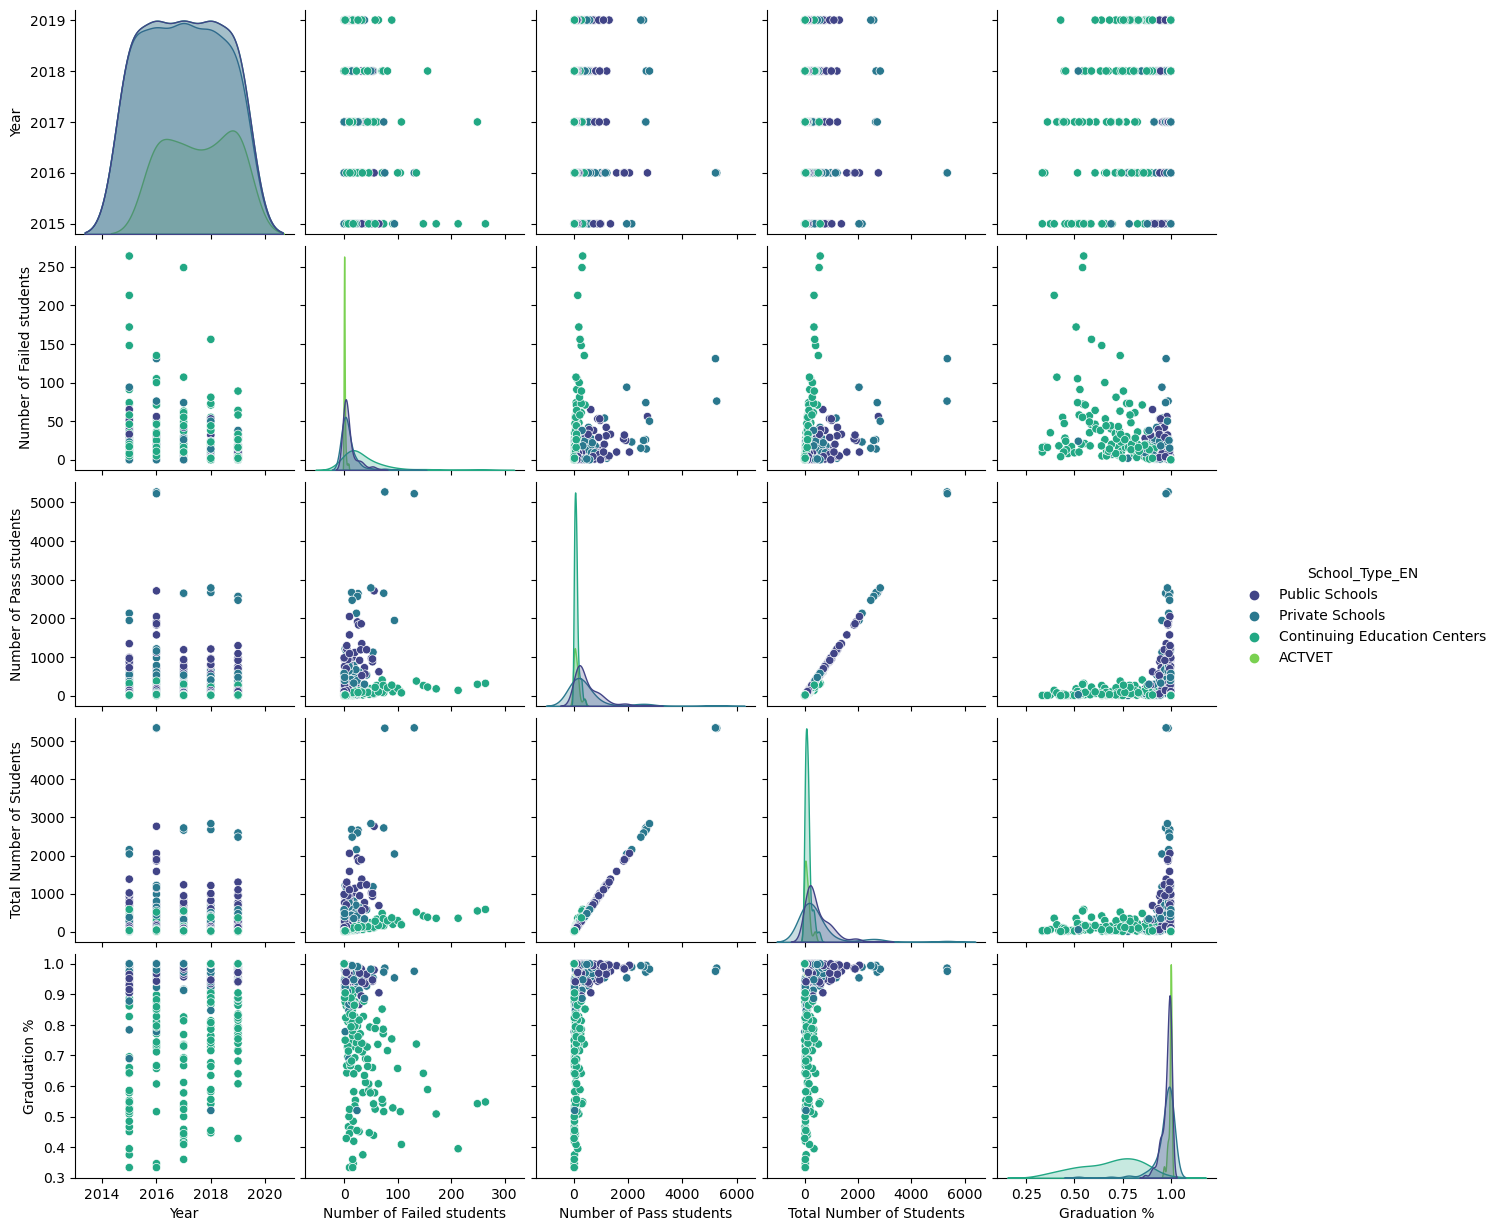

In [14]:
# Pair Plot ,  hue='School_Type_EN'

sns.pairplot(df, hue='School_Type_EN', palette='viridis')

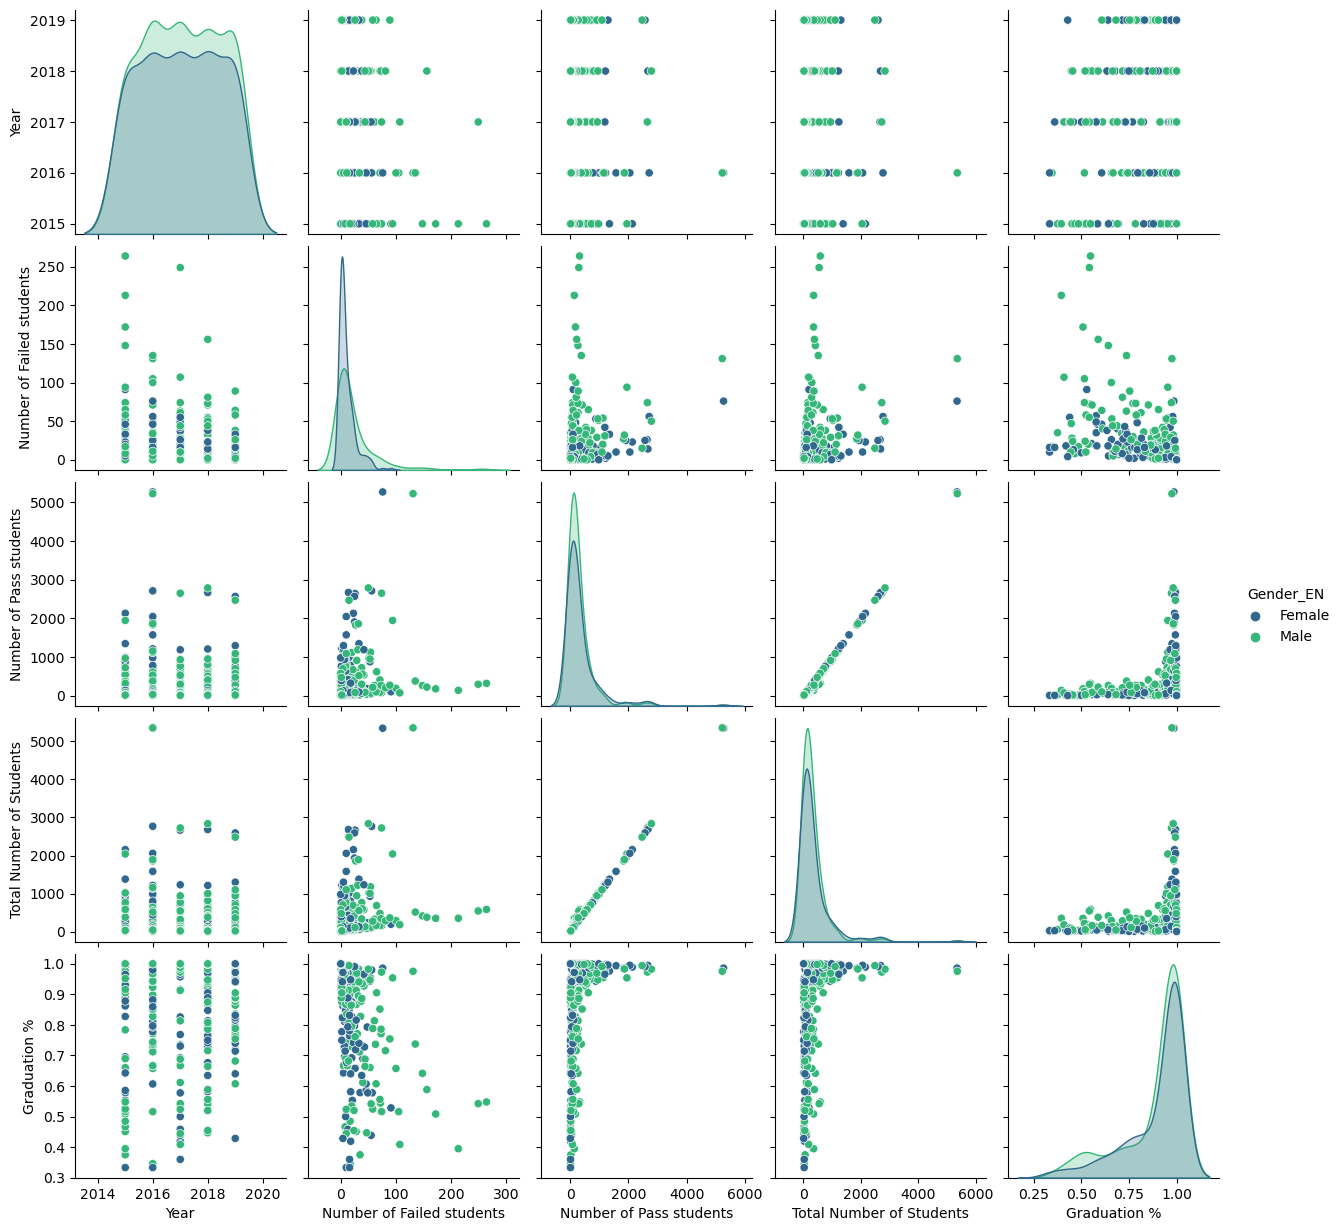

In [15]:
# Pair Plot ,  hue='Gender_EN'

sns.pairplot(df, hue='Gender_EN', palette='viridis')

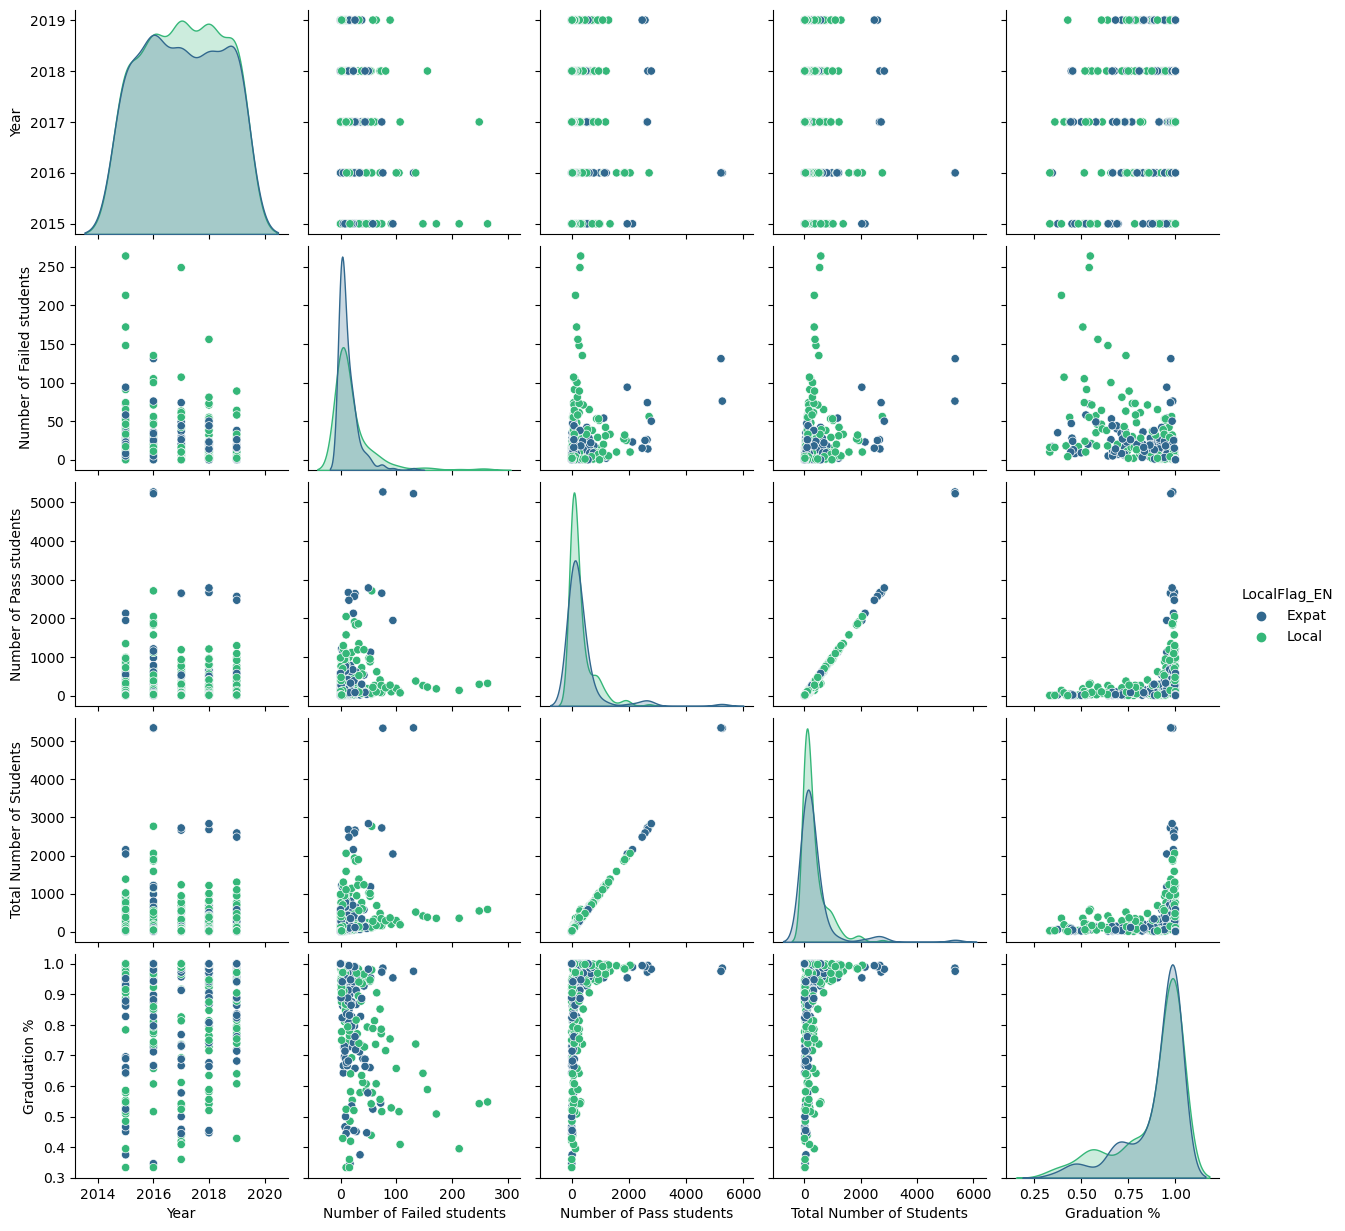

In [16]:
# Pair Plot , hue='LocalFlag_EN'

sns.pairplot(df, hue='LocalFlag_EN', palette='viridis')

**Scatter Plots**

*Total Number of Students vs Number of Failed/Pass students*

<Axes: xlabel='Total Number of Students', ylabel='Number of Pass students'>

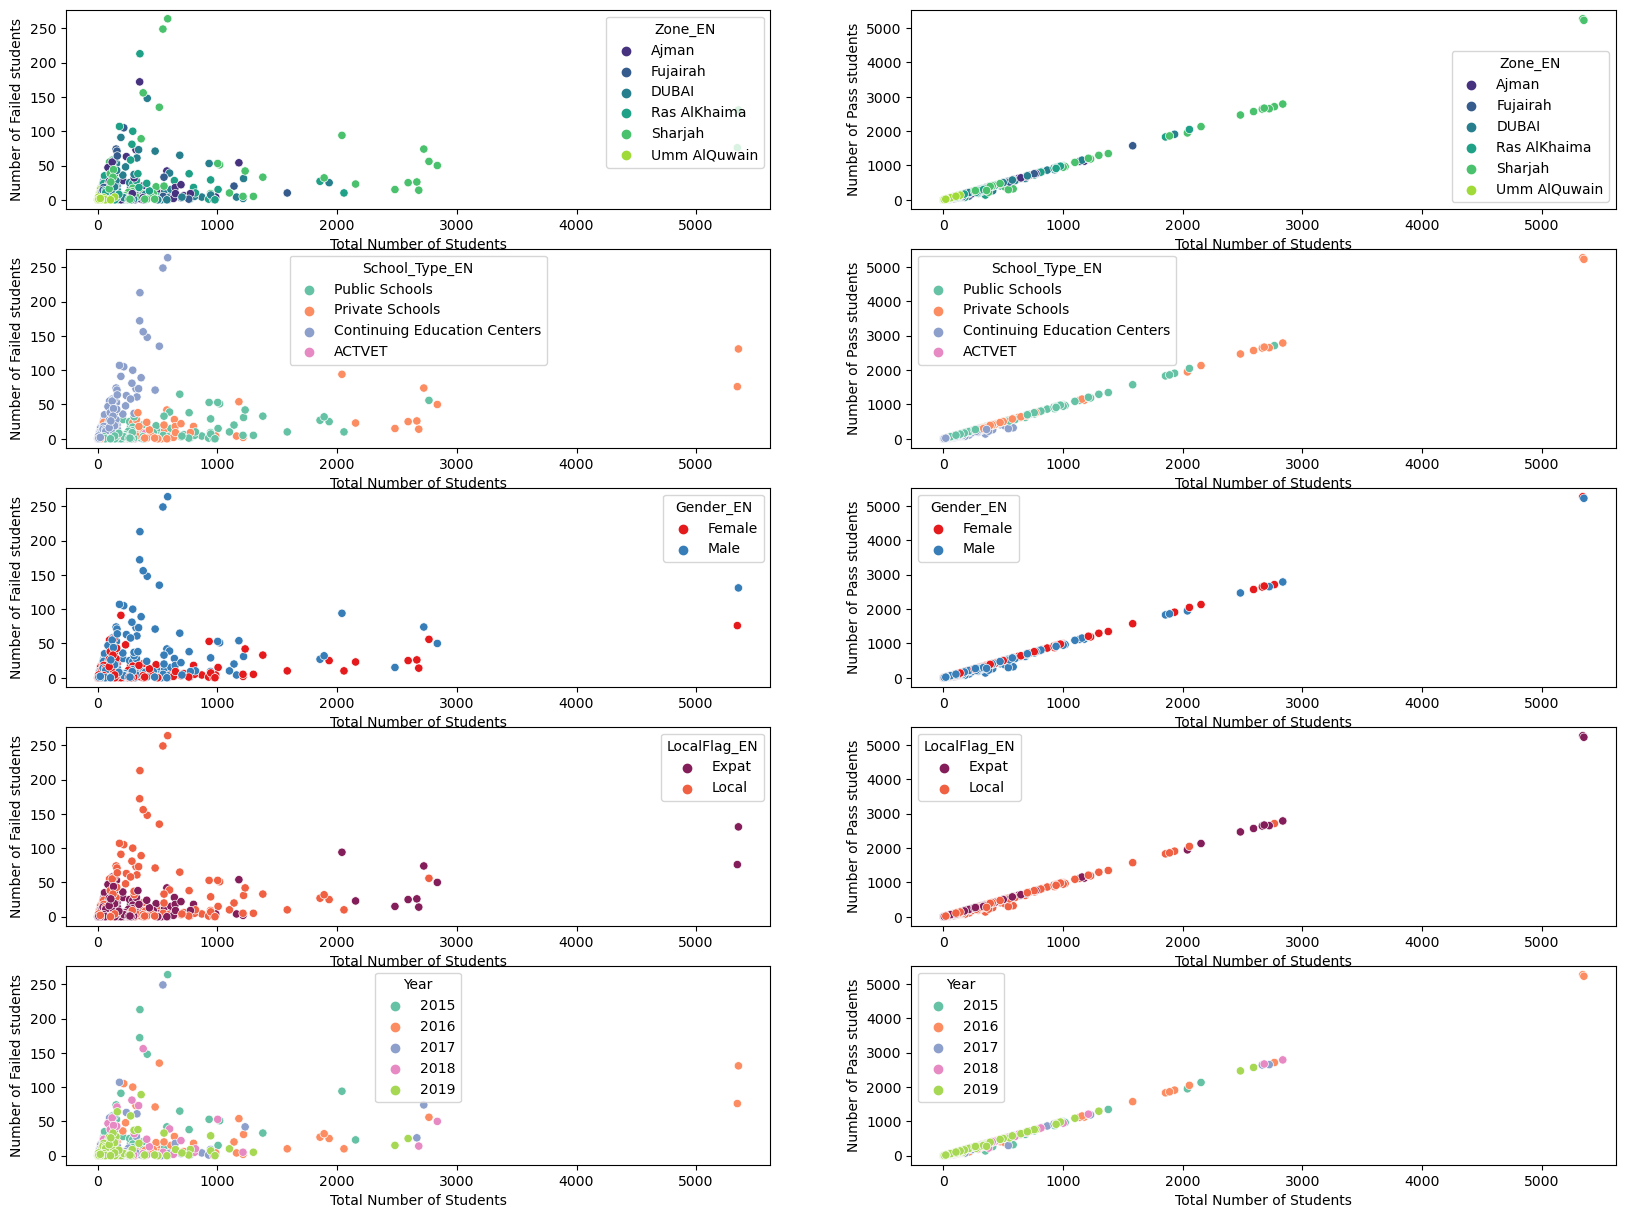

In [17]:
# Scatter plot (Total Number of Students with Number of Failed/Pass students )

plt.figure(figsize = (20,15))

# hue='Zone_EN'
plt.subplot(5,2,1)
sns.scatterplot(x = 'Total Number of Students', y='Number of Failed students' , hue='Zone_EN', palette='viridis', data = df)

plt.subplot(5,2,2)
sns.scatterplot(x = 'Total Number of Students', y='Number of Pass students' , hue='Zone_EN', palette='viridis', data = df)


# hue='School_Type_EN'
plt.subplot(5,2,3)
sns.scatterplot(x = 'Total Number of Students', y='Number of Failed students' , hue='School_Type_EN', palette='Set2', data = df)

plt.subplot(5,2,4)
sns.scatterplot(x = 'Total Number of Students', y='Number of Pass students' , hue='School_Type_EN', palette='Set2', data = df)


#hue='Gender_EN'
plt.subplot(5,2,5)
sns.scatterplot(x = 'Total Number of Students', y='Number of Failed students' , hue='Gender_EN', palette='Set1', data = df)

plt.subplot(5,2,6)
sns.scatterplot(x = 'Total Number of Students', y='Number of Pass students' , hue='Gender_EN', palette='Set1', data = df)


# hue='LocalFlag_EN'
plt.subplot(5,2,7)
sns.scatterplot(x = 'Total Number of Students', y='Number of Failed students' , hue='LocalFlag_EN', palette='rocket', data = df)

plt.subplot(5,2,8)
sns.scatterplot(x = 'Total Number of Students', y='Number of Pass students' , hue='LocalFlag_EN', palette='rocket', data = df)


# hue='Year'
plt.subplot(5,2,9)
sns.scatterplot(x = 'Total Number of Students', y='Number of Failed students' , hue='Year', palette='Set2', data = df)

plt.subplot(5,2,10)
sns.scatterplot(x = 'Total Number of Students', y='Number of Pass students' , hue='Year', palette='Set2', data = df)

*Graduation % vs Number of Failed/Pass Students*

<Axes: xlabel='Graduation %', ylabel='Number of Pass students'>

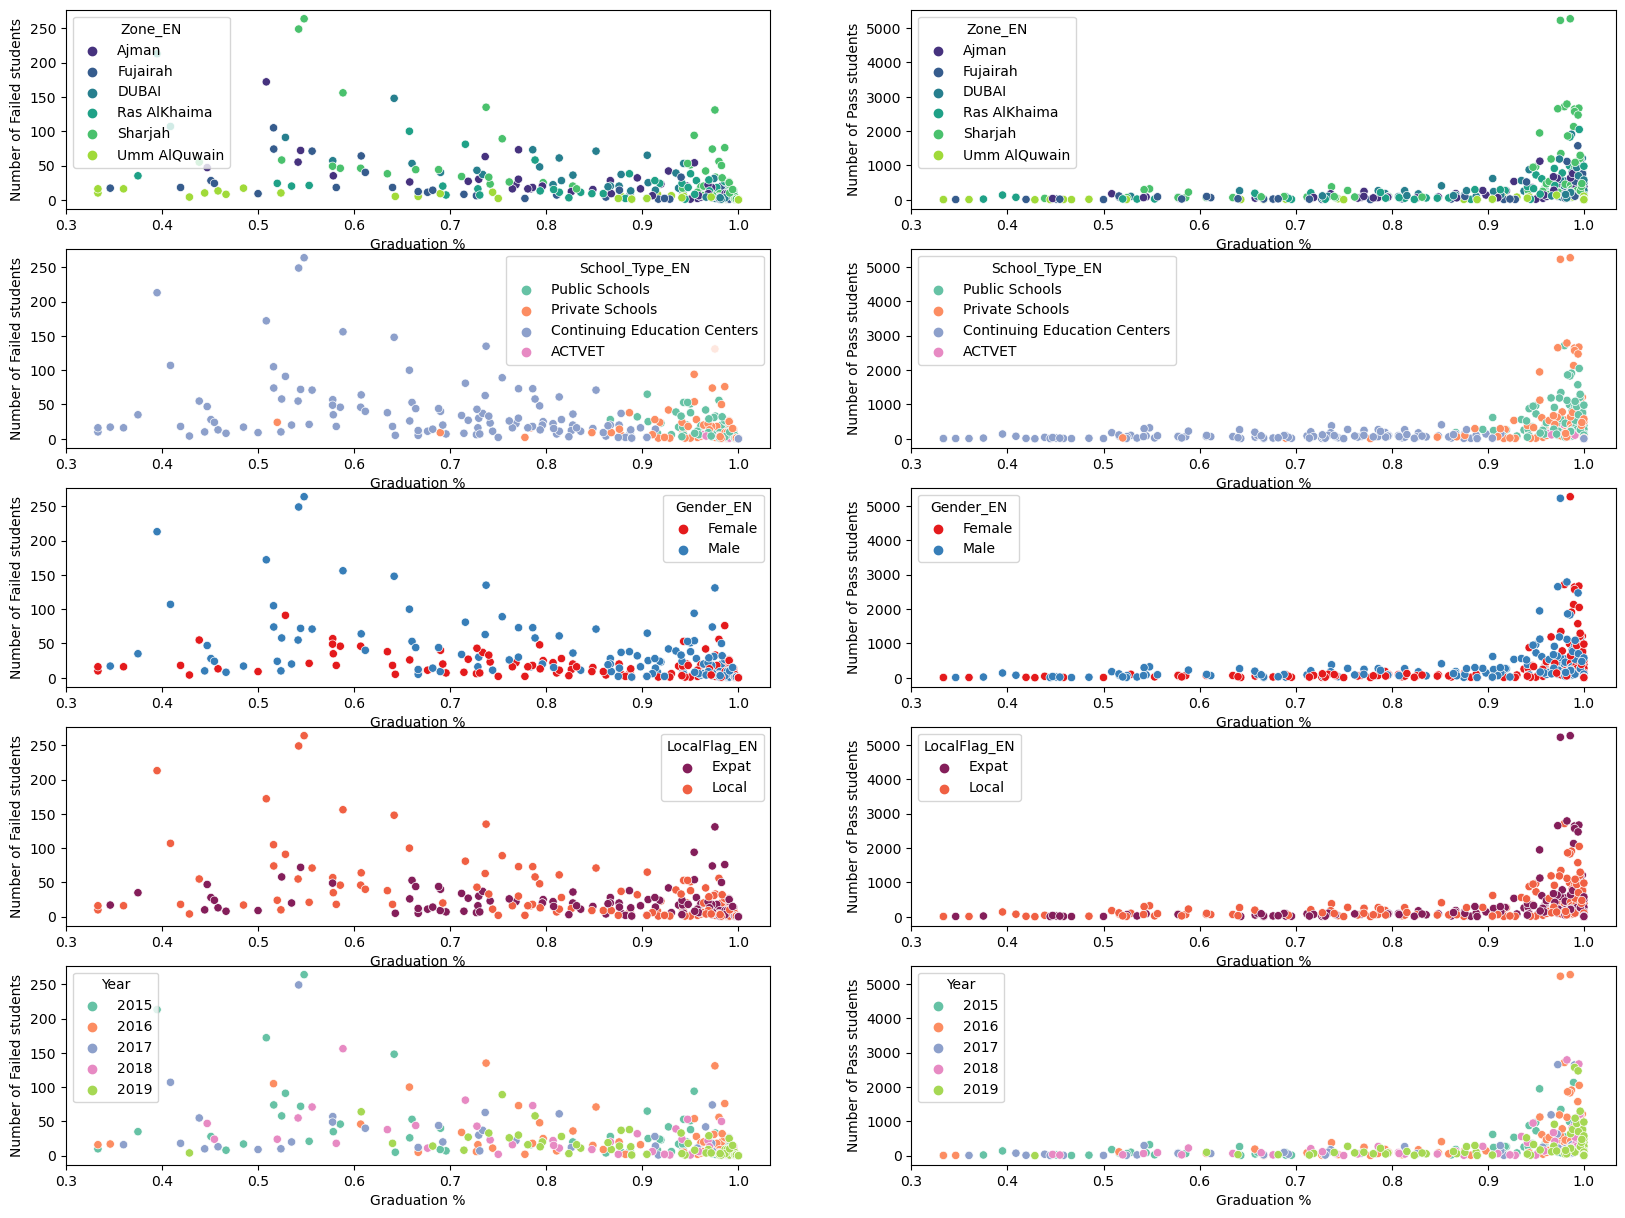

In [18]:
# Scatter plot (Graduation with Number of Failed/Pass students )

plt.figure(figsize = (20,15))

# hue='Zone_EN'
plt.subplot(5,2,1)
sns.scatterplot(x = 'Graduation %', y='Number of Failed students' , hue='Zone_EN', palette='viridis', data = df)

plt.subplot(5,2,2)
sns.scatterplot(x = 'Graduation %', y='Number of Pass students' , hue='Zone_EN', palette='viridis', data = df)


# hue='School_Type_EN'
plt.subplot(5,2,3)
sns.scatterplot(x = 'Graduation %', y='Number of Failed students' , hue='School_Type_EN', palette='Set2', data = df)

plt.subplot(5,2,4)
sns.scatterplot(x = 'Graduation %', y='Number of Pass students' , hue='School_Type_EN', palette='Set2', data = df)


#hue='Gender_EN'
plt.subplot(5,2,5)
sns.scatterplot(x = 'Graduation %', y='Number of Failed students' , hue='Gender_EN', palette='Set1', data = df)

plt.subplot(5,2,6)
sns.scatterplot(x = 'Graduation %', y='Number of Pass students' , hue='Gender_EN', palette='Set1', data = df)


# hue='LocalFlag_EN'
plt.subplot(5,2,7)
sns.scatterplot(x = 'Graduation %', y='Number of Failed students' , hue='LocalFlag_EN', palette='rocket', data = df)

plt.subplot(5,2,8)
sns.scatterplot(x = 'Graduation %', y='Number of Pass students' , hue='LocalFlag_EN', palette='rocket', data = df)


# hue='Year'
plt.subplot(5,2,9)
sns.scatterplot(x = 'Graduation %', y='Number of Failed students' , hue='Year', palette='Set2', data = df)

plt.subplot(5,2,10)
sns.scatterplot(x = 'Graduation %', y='Number of Pass students' , hue='Year', palette='Set2', data = df)

**Kernel Plots of Numeric Variables**

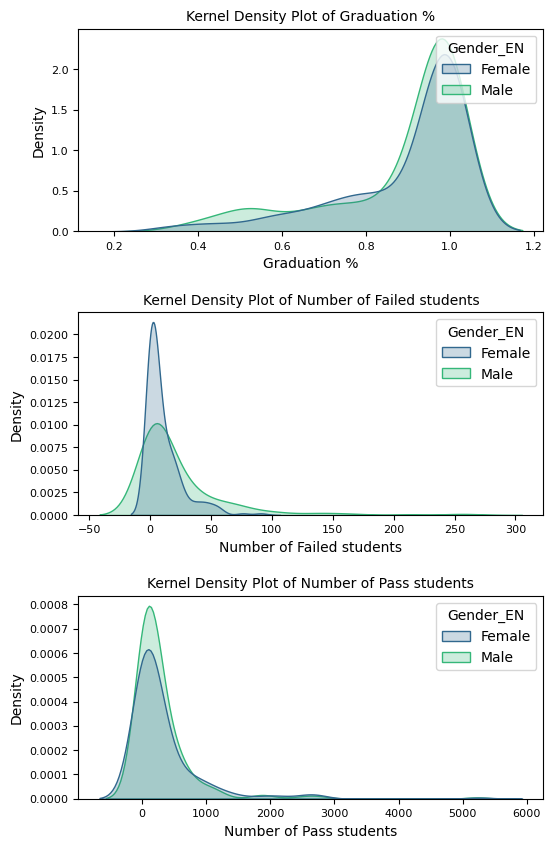

In [19]:
# Kernel plots of numeric variables (Graduation % , Number of Pass students, Number of Failed students )

fig, axs = plt.subplots(3, 1, figsize=(6, 10), gridspec_kw={'hspace': 0.4})

# Kernel density plot of 'Graduation %'
sns.kdeplot(data=df, x='Graduation %', palette='viridis', shade=True, hue='Gender_EN', ax=axs[0])
axs[0].set_xlabel('Graduation %')
axs[0].tick_params(axis='both', labelsize=8)
axs[0].set_title('Kernel Density Plot of Graduation %', fontsize=10) 

# Kernel density plot of 'Number of Failed students'
sns.kdeplot(data=df, x='Number of Failed students', palette='viridis', shade=True, hue='Gender_EN', ax=axs[1])
axs[1].set_xlabel('Number of Failed students')
axs[1].tick_params(axis='both', labelsize=8)
axs[1].set_title('Kernel Density Plot of Number of Failed students', fontsize=10)  

# Kernel density plot of 'Number of Pass students'
sns.kdeplot(data=df, x='Number of Pass students', palette='viridis', shade=True, hue='Gender_EN', ax=axs[2])
axs[2].set_xlabel('Number of Pass students')
axs[2].tick_params(axis='both', labelsize=8)
axs[2].set_title('Kernel Density Plot of Number of Pass students', fontsize=10)  

plt.show()

**Count Plots of Categorical Variables**

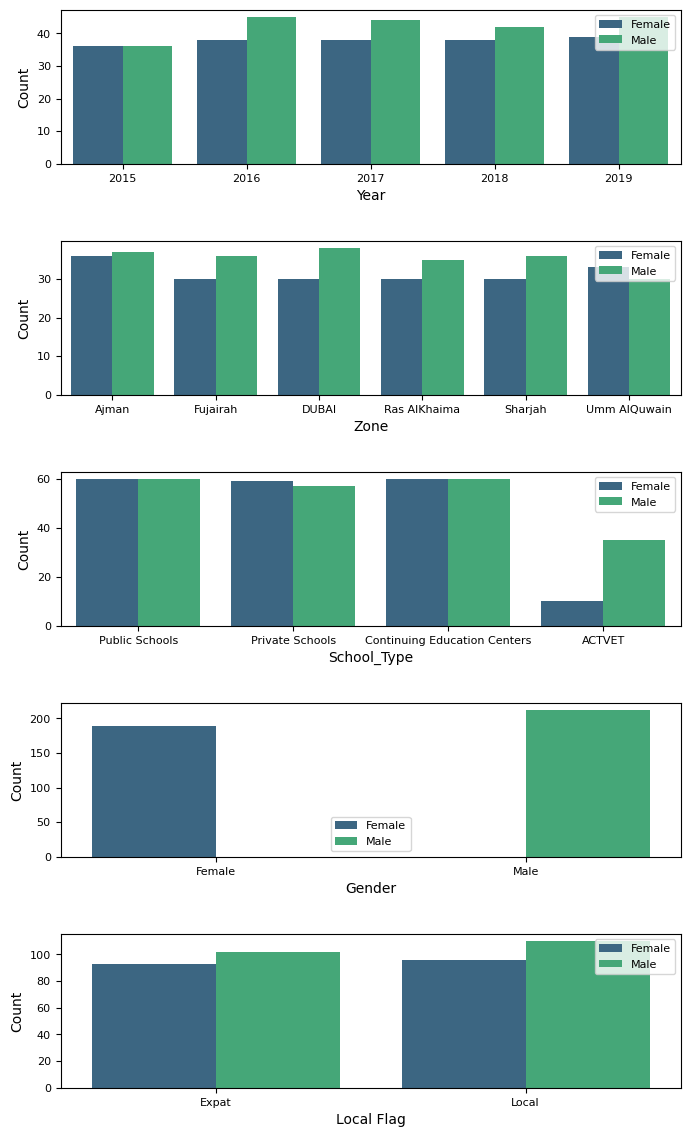

In [20]:
# Count plots of Categorical variables (Year, Zone, School_type, Gender, Local Flag )

fig, axs = plt.subplots(5, 1, figsize=(8, 14), gridspec_kw={'hspace': 0.5})

# Count plot of 'Year'
sns.countplot(data=df, x='Year', palette='viridis', hue='Gender_EN', ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='both', labelsize=8)
axs[0].legend(fontsize=8)
# axs[0].set_title('Count Plot of Year')

# Count plot of 'Zone'
sns.countplot(data=df, x='Zone_EN', palette='viridis', hue='Gender_EN', ax=axs[1])
axs[1].set_xlabel('Zone')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='both', labelsize=8)
axs[1].legend(fontsize=8)
# axs[1].set_title('Count Plot of Zone')

# Count plot of 'School_Type'
sns.countplot(data=df, x='School_Type_EN', palette='viridis', hue='Gender_EN', ax=axs[2])
axs[2].set_xlabel('School_Type')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='both', labelsize=8)
axs[2].legend(fontsize=8)
# axs[2].set_title('Count Plot of School_Type')

# Count plot of 'Gender'
sns.countplot(data=df, x='Gender_EN', palette='viridis', hue='Gender_EN', ax=axs[3])
axs[3].set_xlabel('Gender')
axs[3].set_ylabel('Count')
axs[3].tick_params(axis='both', labelsize=8)
axs[3].legend(fontsize=8)
# axs[3].set_title('Count Plot of Gender')

# Count plot of 'Local Flag'
sns.countplot(data=df, x='LocalFlag_EN', palette='viridis', hue='Gender_EN', ax=axs[4])
axs[4].set_xlabel('Local Flag')
axs[4].set_ylabel('Count')
axs[4].tick_params(axis='both', labelsize=8)
axs[4].legend(fontsize=8)
# axs[4].set_title('Count Plot of Local Flag')

# Show the plots
plt.tight_layout()
plt.show()


**Box Plots of Categorical Variables**

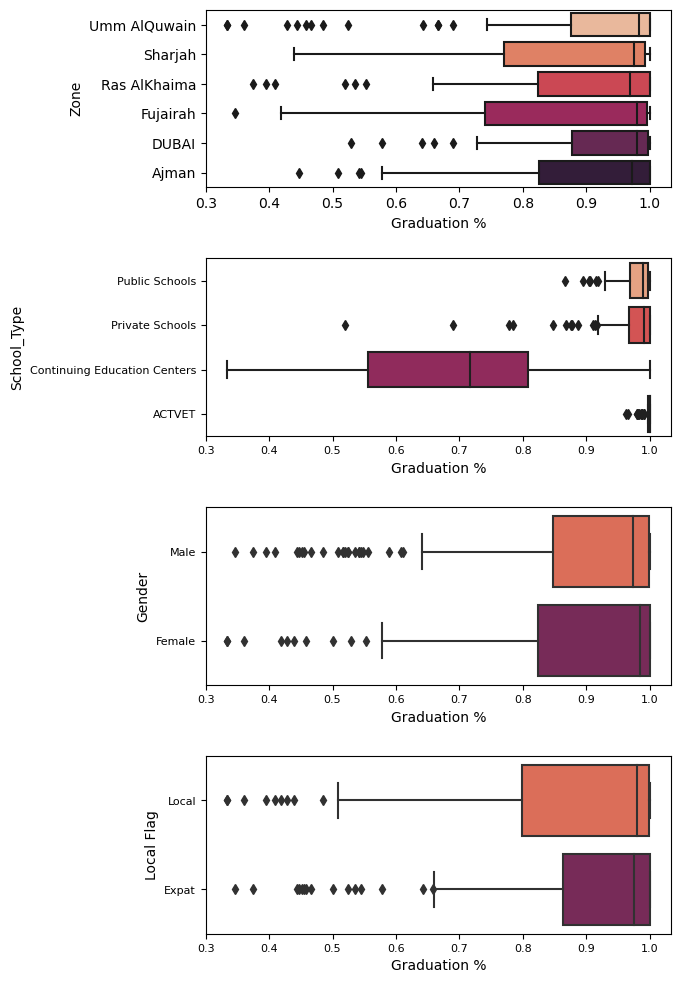

In [21]:
# Box plots of Categorical variables (Year, Zone, School_type, Gender, Local Flag )

fig, axs = plt.subplots(4, 1, figsize=(6, 12), gridspec_kw={'hspace': 0.4})


# Box plot of 'Zone'
sns.boxplot(x='Graduation %',y='Zone_EN', palette="rocket_r", data=df.sort_values('Zone_EN',ascending=False), ax=axs[0])
axs[0].set_xlabel('Graduation %')
axs[0].set_ylabel('Zone')


# Box plot of 'School_Type'
sns.boxplot(x='Graduation %',y='School_Type_EN', palette="rocket_r", data=df.sort_values('School_Type_EN',ascending=False), ax=axs[1])
axs[1].set_xlabel('Graduation %')
axs[1].set_ylabel('School_Type')
axs[1].tick_params(axis='both', labelsize=8)


# Box plot of 'Gender'
sns.boxplot(x='Graduation %',y='Gender_EN', palette="rocket_r", data=df.sort_values('Gender_EN',ascending=False), ax=axs[2])
axs[2].set_xlabel('Graduation %')
axs[2].set_ylabel('Gender')
axs[2].tick_params(axis='both', labelsize=8)


# Box plot of 'Local Flag'
sns.boxplot(x='Graduation %',y='LocalFlag_EN', palette="rocket_r", data=df.sort_values('LocalFlag_EN',ascending=False), ax=axs[3])
axs[3].set_xlabel('Graduation %')
axs[3].set_ylabel('Local Flag')
axs[3].tick_params(axis='both', labelsize=8)


plt.tight_layout()
plt.show()


**Number of Pass/Failed Students and Year**

In [22]:
# Group by 'Year' and calculate the Mean:

df_Mean_Year=df.groupby(['Year'])[['Number of Failed students','Number of Pass students' , 'Total Number of Students']].aggregate('mean').round(1)
df_Mean_Year

,Number of Failed students,Number of Pass students,Total Number of Students
Year,,,
2015,30.4,276.4,306.8
2016,18.6,521.3,539.8
2017,15.1,259.6,274.7
2018,14.4,276.7,291.2
2019,9.8,264.1,273.9


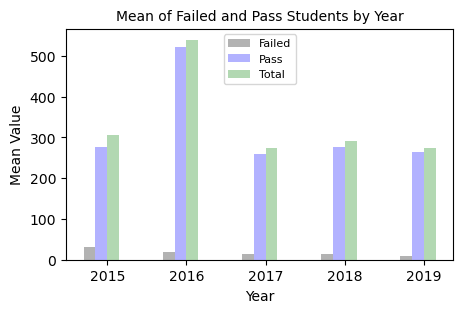

In [23]:
# Plot the bar chart:

positions = list(range(len(df_Mean_Year.index)))
width = 0.15

# plotting the bars
fix, ax = plt.subplots(figsize=(5,3))


plt.bar(positions, df_Mean_Year['Number of Failed students'], 
        width, color = 'black', alpha = 0.3, label='Failed'),

 
plt.bar([p+ width for p in positions ], df_Mean_Year['Number of Pass students'], 
        width, color ='blue', alpha = 0.3, label='Pass')


plt.bar([p+ width*2 for p in positions ], df_Mean_Year['Total Number of Students'], 
        width, color ='green', alpha = 0.3, label='Total')

#plt.bar([p+ width*3 for p in positions ], df_Mean['Graduation %'], 
#        width, color ='red', alpha = 0.3, label='Graduation')

ax.set_title('Mean of Failed and Pass Students by Year', fontsize=10)  
ax.set_ylabel('Mean Value')
ax.set_xlabel('Year')
ax.set_xticks([p + 1.5*width for p in positions])
ax.set_xticklabels(df_Mean_Year.index)

plt.legend(['Failed','Pass','Total'], loc = 'upper center', fontsize=8)
plt.show()

In [24]:
# Group by 'Year' and calculate the percentage:

df_Percentage_Year = df.groupby(['Year'])[['Number of Failed students', 'Number of Pass students', 'Total Number of Students']].sum()
df_Percentage_Year['Failed %'] = (df_Percentage_Year['Number of Failed students'] / df_Percentage_Year['Total Number of Students']) * 100
df_Percentage_Year['Pass %'] = (df_Percentage_Year['Number of Pass students'] / df_Percentage_Year['Total Number of Students']) * 100

# Round the percentage columns to one decimal place
df_Percentage_Year = df_Percentage_Year.round(1)

# Display the DataFrame with percentage columns
df_Percentage_Year


,Number of Failed students,Number of Pass students,Total Number of Students,Failed %,Pass %
Year,,,,,
2015,2186,19901,22087,9.9,90.1
2016,1541,43264,44805,3.4,96.6
2017,1235,21290,22525,5.5,94.5
2018,1156,22139,23295,5.0,95.0
2019,821,22188,23009,3.6,96.4


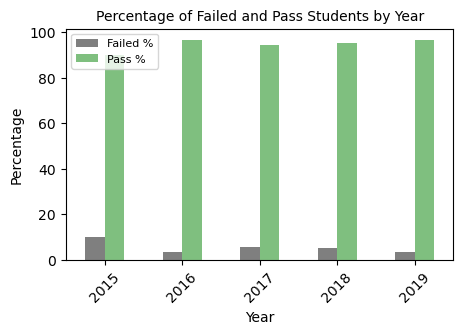

In [25]:
# Plot the bar chart:

df_Percentage_Year[['Failed %', 'Pass %']].plot(kind='bar', figsize=(5, 3), color=['black','green'], alpha=0.5)

# Customize the plot
plt.title('Percentage of Failed and Pass Students by Year', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper left', labels=['Failed %', 'Pass %'], fontsize=8)

# Show the plot
plt.show()


**Number of Pass/Failed Students and Gender**

In [26]:
# Group by 'Gender' and calculate the Mean:

df_Mean_Gender=df.groupby(['Gender_EN'])[['Number of Failed students','Number of Pass students' , 'Total Number of Students']].aggregate('mean').round(1)
df_Mean_Gender

,Number of Failed students,Number of Pass students,Total Number of Students
Gender_EN,,,
Female,10.5,341.1,351.6
Male,23.4,303.4,326.7


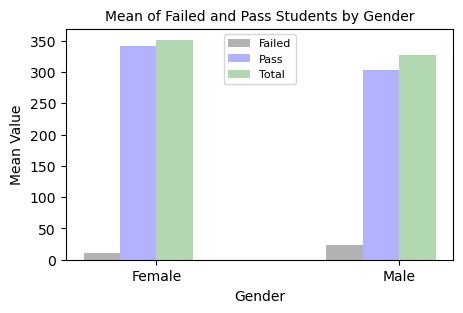

In [27]:
# Plot the bar chart:

positions = list(range(len(df_Mean_Gender.index)))
width = 0.15

# plotting the bars
fix, ax = plt.subplots(figsize=(5,3))


plt.bar(positions, df_Mean_Gender['Number of Failed students'], 
        width, color = 'black', alpha = 0.3, label='Failed'),

 
plt.bar([p+ width for p in positions ], df_Mean_Gender['Number of Pass students'], 
        width, color ='blue', alpha = 0.3, label='Pass')


plt.bar([p+ width*2 for p in positions ], df_Mean_Gender['Total Number of Students'], 
        width, color ='green', alpha = 0.3, label='Total')



ax.set_title('Mean of Failed and Pass Students by​ Gender', fontsize=10)  # Set the title and its font size directly using set_title()
ax.set_ylabel('Mean Value')
ax.set_xlabel('Gender')
ax.set_xticks([p + 1.5*width for p in positions])
ax.set_xticklabels(df_Mean_Gender.index)

plt.legend(['Failed','Pass','Total'], loc = 'upper center', fontsize=8)
plt.show()

In [28]:
# Group by 'Gender' and calculate the percentage:

df_Percentage_Gender = df.groupby(['Gender_EN'])[['Number of Failed students', 'Number of Pass students', 'Total Number of Students']].sum()
df_Percentage_Gender['Failed %'] = (df_Percentage_Gender['Number of Failed students'] / df_Percentage_Gender['Total Number of Students']) * 100
df_Percentage_Gender['Pass %'] = (df_Percentage_Gender['Number of Pass students'] / df_Percentage_Gender['Total Number of Students']) * 100

# Round the percentage columns to one decimal place
df_Percentage_Gender = df_Percentage_Gender.round(1)

# Display the DataFrame with percentage columns
df_Percentage_Gender

,Number of Failed students,Number of Pass students,Total Number of Students,Failed %,Pass %
Gender_EN,,,,,
Female,1988,64469,66457,3.0,97.0
Male,4951,64313,69264,7.1,92.9


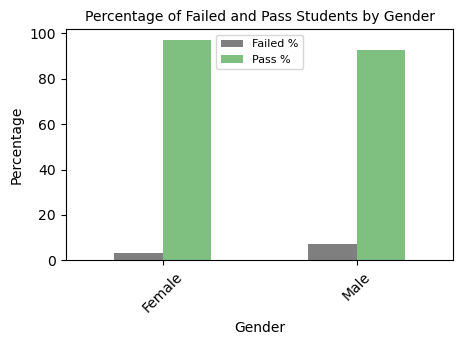

In [29]:
# Plot the bar chart:

df_Percentage_Gender[['Failed %', 'Pass %']].plot(kind='bar', figsize=(5, 3), color=['black','green'], alpha=0.5)

# Customize the plot
plt.title('Percentage of Failed and Pass Students by Gender', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper center', labels=['Failed %', 'Pass %'], fontsize=8)

# Show the plot
plt.show()

**Number of Pass/Failed Students and Zone**

In [30]:
# Group by 'Zone' column and calculate the Mean:

df_Mean_Zone=df.groupby(['Zone_EN'])[['Number of Failed students','Number of Pass students' , 'Total Number of Students']].aggregate('mean').round(1)
df_Mean_Zone

,Number of Failed students,Number of Pass students,Total Number of Students
Zone_EN,,,
Ajman,16.0,228.1,244.1
DUBAI,19.0,351.6,370.7
Fujairah,10.8,184.8,195.7
Ras AlKhaima,17.7,305.0,322.8
Sharjah,36.5,810.8,847.2
Umm AlQuwain,3.3,42.6,45.8


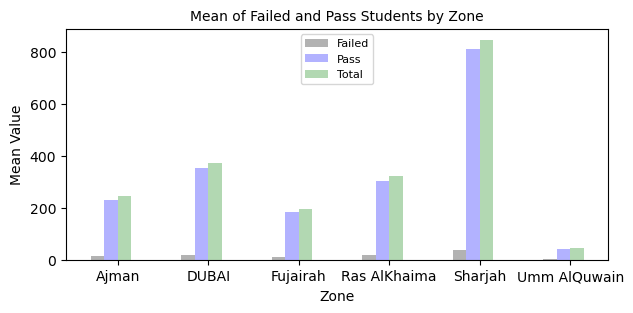

In [31]:
# Plot the bar chart:

positions = list(range(len(df_Mean_Zone.index)))
width = 0.15

# plotting the bars
fix, ax = plt.subplots(figsize=(7,3))


plt.bar(positions, df_Mean_Zone['Number of Failed students'], 
        width, color = 'black', alpha = 0.3, label='Failed'),

 
plt.bar([p+ width for p in positions ], df_Mean_Zone['Number of Pass students'], 
        width, color ='blue', alpha = 0.3, label='Pass')


plt.bar([p+ width*2 for p in positions ], df_Mean_Zone['Total Number of Students'], 
        width, color ='green', alpha = 0.3, label='Total')



ax.set_title('Mean of Failed and Pass Students by Zone', fontsize=10)  
ax.set_ylabel('Mean Value')
ax.set_xlabel('Zone')
ax.set_xticks([p + 1.5*width for p in positions])
ax.set_xticklabels(df_Mean_Zone.index)

plt.legend(['Failed','Pass','Total'], loc = 'upper center', fontsize=8)
plt.show()

In [32]:
# Group by 'Zone' and calculate the percentage:

df_Percentage_Zone = df.groupby(['Zone_EN'])[['Number of Failed students', 'Number of Pass students', 'Total Number of Students']].sum()
df_Percentage_Zone['Failed %'] = (df_Percentage_Zone['Number of Failed students'] / df_Percentage_Zone['Total Number of Students']) * 100
df_Percentage_Zone['Pass %'] = (df_Percentage_Zone['Number of Pass students'] / df_Percentage_Zone['Total Number of Students']) * 100

# Round the percentage columns to one decimal place
df_Percentage_Zone = df_Percentage_Zone.round(1)

# Display the DataFrame with percentage columns
df_Percentage_Zone

,Number of Failed students,Number of Pass students,Total Number of Students,Failed %,Pass %
Zone_EN,,,,,
Ajman,1165,16653,17818,6.5,93.5
DUBAI,1294,23912,25206,5.1,94.9
Fujairah,715,12198,12913,5.5,94.5
Ras AlKhaima,1152,19828,20980,5.5,94.5
Sharjah,2406,53510,55916,4.3,95.7
Umm AlQuwain,207,2681,2888,7.2,92.8


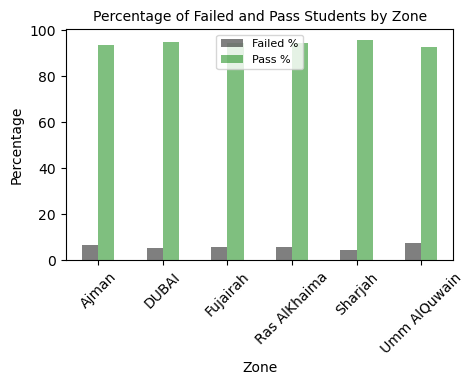

In [33]:
# Plot the bar chart:

df_Percentage_Zone[['Failed %', 'Pass %']].plot(kind='bar', figsize=(5, 3), color=['black','green'], alpha=0.5)

# Customize the plot
plt.title('Percentage of Failed and Pass Students by Zone', fontsize=10)
plt.xlabel('Zone')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper center', labels=['Failed %', 'Pass %'], fontsize=8)

# Show the plot
plt.show()

**Number of Pass/Failed Students and School_Type**

In [34]:
# Group by 'School Type' and calculate the Mean:

df_Mean_School=df.groupby(['School_Type_EN'])[['Number of Failed students','Number of Pass students' , 'Total Number of Students']].aggregate('mean').round(1)
df_Mean_School

,Number of Failed students,Number of Pass students,Total Number of Students
School_Type_EN,,,
ACTVET,0.7,88.6,89.4
Continuing Education Centers,38.4,84.1,122.6
Private Schools,9.8,482.9,492.7
Public Schools,9.7,489.0,498.7


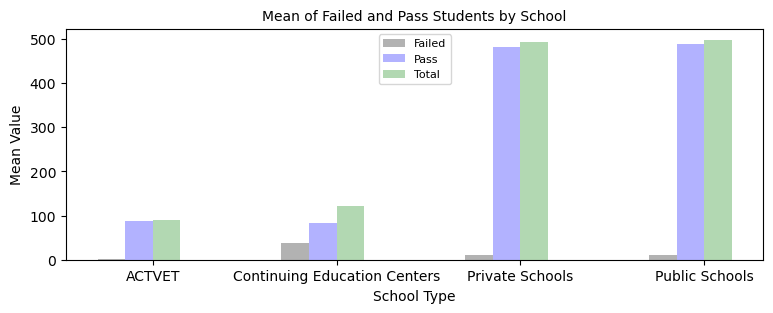

In [35]:
# Plot the bar chart:

positions = list(range(len(df_Mean_School.index)))
width = 0.15

# plotting the bars
fix, ax = plt.subplots(figsize=(9,3))


plt.bar(positions, df_Mean_School['Number of Failed students'], 
        width, color = 'black', alpha = 0.3, label='Failed'),

 
plt.bar([p+ width for p in positions ], df_Mean_School['Number of Pass students'], 
        width, color ='blue', alpha = 0.3, label='Pass')


plt.bar([p+ width*2 for p in positions ], df_Mean_School['Total Number of Students'], 
        width, color ='green', alpha = 0.3, label='Total')



ax.set_title('Mean of Failed and Pass Students by School', fontsize=10)  
ax.set_ylabel('Mean Value')
ax.set_xlabel('School Type')
ax.set_xticks([p + 1.5*width for p in positions])
ax.set_xticklabels(df_Mean_School.index)

plt.legend(['Failed','Pass','Total'], loc = 'upper center', fontsize=8)
plt.show()

In [36]:
# Group by 'Schoo Type' and calculate the percentage:

df_Percentage_School = df.groupby(['School_Type_EN'])[['Number of Failed students', 'Number of Pass students', 'Total Number of Students']].sum()
df_Percentage_School['Failed %'] = (df_Percentage_School['Number of Failed students'] / df_Percentage_School['Total Number of Students']) * 100
df_Percentage_School['Pass %'] = (df_Percentage_School['Number of Pass students'] / df_Percentage_School['Total Number of Students']) * 100

# Round the percentage columns to one decimal place
df_Percentage_School = df_Percentage_School.round(1)

# Display the DataFrame with percentage columns
df_Percentage_School

,Number of Failed students,Number of Pass students,Total Number of Students,Failed %,Pass %
School_Type_EN,,,,,
ACTVET,33,3988,4021,0.8,99.2
Continuing Education Centers,4613,10097,14710,31.4,68.6
Private Schools,1132,56016,57148,2.0,98.0
Public Schools,1161,58681,59842,1.9,98.1


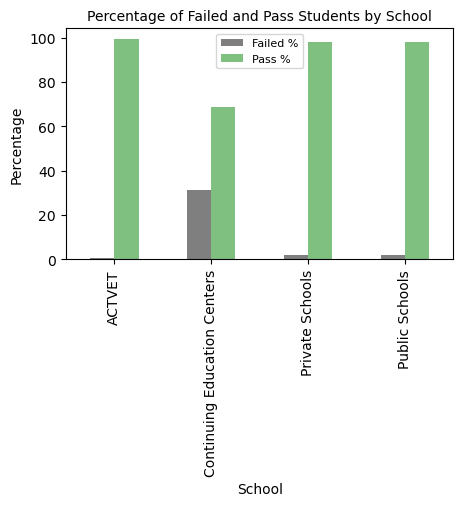

In [37]:
# Plot the bar chart:

df_Percentage_School[['Failed %', 'Pass %']].plot(kind='bar', figsize=(5, 3), color=['black','green'], alpha=0.5)

# Customize the plot
plt.title('Percentage of Failed and Pass Students by School', fontsize=10)
plt.xlabel('School')
plt.ylabel('Percentage')
#plt.xticks(rotation=90)
plt.legend(loc='upper center', labels=['Failed %', 'Pass %'], fontsize=8)

# Show the plot
plt.show()

**Number of Pass/Failed Students and Local Flag**

In [38]:
# Group by 'Local Flag' and calculate the Mean:

df_Mean_Flag=df.groupby(['LocalFlag_EN'])[['Number of Failed students','Number of Pass students' , 'Total Number of Students']].aggregate('mean').round(1)
df_Mean_Flag

,Number of Failed students,Number of Pass students,Total Number of Students
LocalFlag_EN,,,
Expat,12.6,338.7,351.3
Local,21.7,304.6,326.3


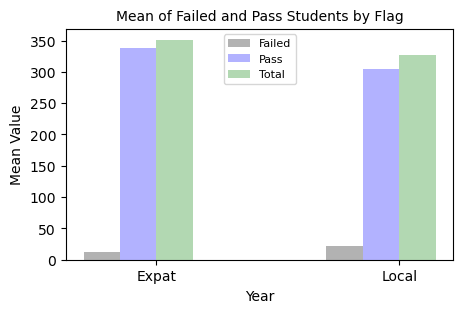

In [39]:
# Plot the bar chart:

positions = list(range(len(df_Mean_Flag.index)))
width = 0.15

# plotting the bars
fix, ax = plt.subplots(figsize=(5,3))


plt.bar(positions, df_Mean_Flag['Number of Failed students'], 
        width, color = 'black', alpha = 0.3, label='Failed'),

 
plt.bar([p+ width for p in positions ], df_Mean_Flag['Number of Pass students'], 
        width, color ='blue', alpha = 0.3, label='Pass')


plt.bar([p+ width*2 for p in positions ], df_Mean_Flag['Total Number of Students'], 
        width, color ='green', alpha = 0.3, label='Total')



ax.set_title('Mean of Failed and Pass Students by Flag', fontsize=10)  
ax.set_ylabel('Mean Value')
ax.set_xlabel('Year')
ax.set_xticks([p + 1.5*width for p in positions])
ax.set_xticklabels(df_Mean_Flag.index)

plt.legend(['Failed','Pass','Total'], loc = 'upper center', fontsize=8)
plt.show()

In [40]:
# Group by 'Local Flag' and calculate the percentage:

df_Percentage_Flag = df.groupby(['LocalFlag_EN'])[['Number of Failed students', 'Number of Pass students', 'Total Number of Students']].sum()
df_Percentage_Flag['Failed %'] = (df_Percentage_Flag['Number of Failed students'] / df_Percentage_Flag['Total Number of Students']) * 100
df_Percentage_Flag['Pass %'] = (df_Percentage_Flag['Number of Pass students'] / df_Percentage_Flag['Total Number of Students']) * 100

# Round the percentage columns to one decimal place
df_Percentage_Flag = df_Percentage_Flag.round(1)

# Display the DataFrame with percentage columns
df_Percentage_Flag

,Number of Failed students,Number of Pass students,Total Number of Students,Failed %,Pass %
LocalFlag_EN,,,,,
Expat,2464,66037,68501,3.6,96.4
Local,4475,62745,67220,6.7,93.3


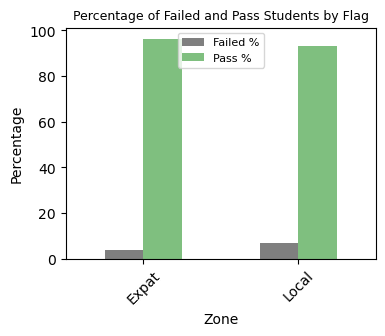

In [41]:
# Plot the bar chart:

df_Percentage_Flag[['Failed %', 'Pass %']].plot(kind='bar', figsize=(4, 3), color=['black','green'], alpha=0.5)

# Customize the plot
plt.title('Percentage of Failed and Pass Students by Flag', fontsize=9)
plt.xlabel('Zone')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper center', labels=['Failed %', 'Pass %'], fontsize=8)

# Show the plot
plt.show()

**correlation**

In [42]:
# Finding correlation between numeric features:

numeric_columns = ["Number of Failed students", "Number of Pass students", "Total Number of Students", "Graduation %"]
df_corr = df[numeric_columns].corr()
df_corr

,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
Number of Failed students,1.000000,0.214411,0.265374,-0.513673
Number of Pass students,0.214411,1.000000,0.998622,0.237703
Total Number of Students,0.265374,0.998622,1.000000,0.207038
Graduation %,-0.513673,0.237703,0.207038,1.000000


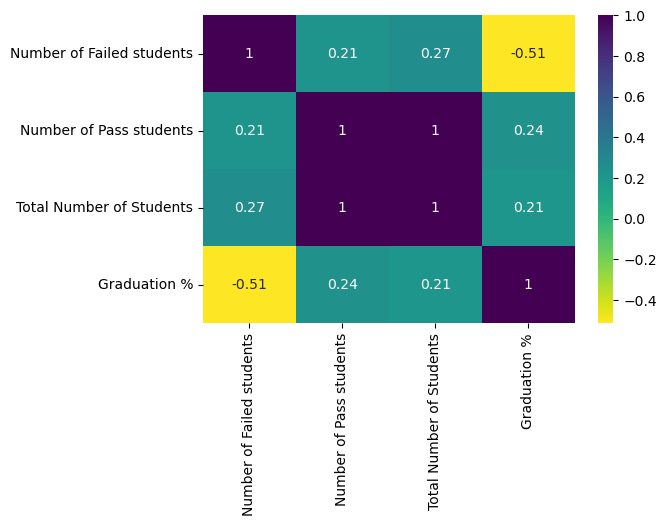

In [43]:
corr_matrix = df[numeric_columns].corr()
plt.figure(figsize = (6,4))
sns_plot=sns.heatmap(corr_matrix,annot=True, cmap='viridis_r')
plt.show()

In [44]:
df_corr["Graduation %"].sort_values(ascending=False)

Graduation %                 1.000000
Number of Pass students      0.237703
Total Number of Students     0.207038
Number of Failed students   -0.513673
Name: Graduation %, dtype: float64

In [45]:
df_corr["Total Number of Students"].sort_values(ascending=False)

Total Number of Students     1.000000
Number of Pass students      0.998622
Number of Failed students    0.265374
Graduation %                 0.207038
Name: Total Number of Students, dtype: float64

In [46]:
df_corr["Number of Pass students"].sort_values(ascending=False)

Number of Pass students      1.000000
Total Number of Students     0.998622
Graduation %                 0.237703
Number of Failed students    0.214411
Name: Number of Pass students, dtype: float64

In [47]:
df_corr["Number of Failed students"].sort_values(ascending=False)

Number of Failed students    1.000000
Total Number of Students     0.265374
Number of Pass students      0.214411
Graduation %                -0.513673
Name: Number of Failed students, dtype: float64